## `da.map_block` vs Dask API

We have two options for most operations on Dask arrays:
- Using `da.map_block` to apply operations chunk-wise
- Using operators provided by Dask (`+`, `-`, ...)

In [1]:
import dask.array as da
import numpy as np

from plot_machinery.plot import data, kernel, plot, repeat_count, clear_kernels

In [2]:
@data(steps=[10, 50, 100, 500, 1000, 5000, 10000, 50000])
def data_func(step):
    return (da.zeros((step, 100)),)

## Simple sum

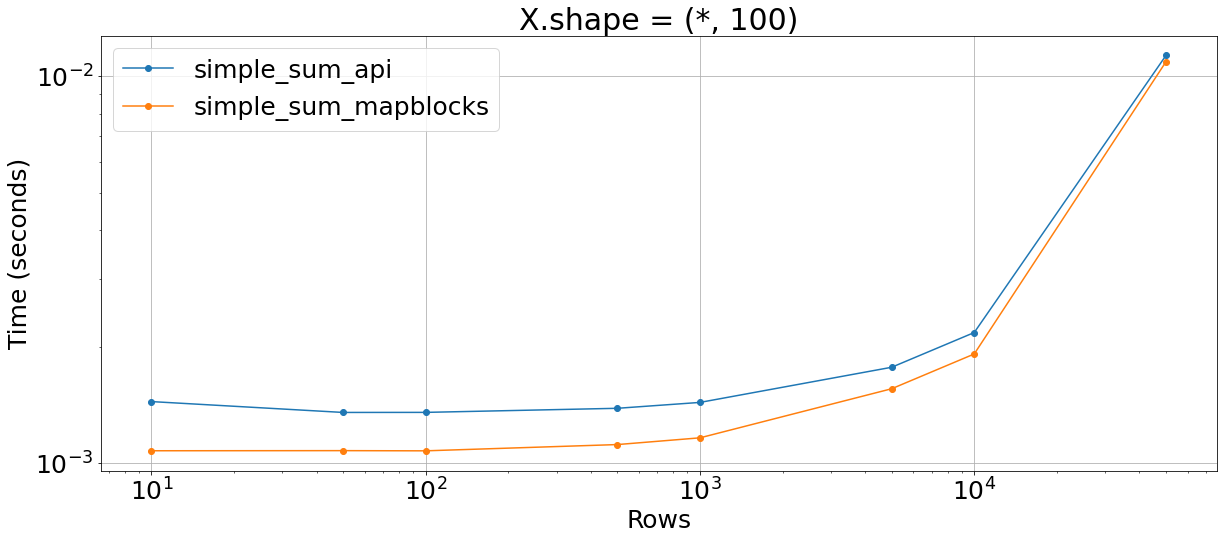

In [3]:
clear_kernels()


@kernel()
def simple_sum_api(y):
    return (y - 10).compute()


@kernel()
def simple_sum_mapblocks(y):
    return y.map_blocks(lambda x: x - 10).compute()


plot(logx=True, logy=True, xlabel="Rows", title="X.shape = (*, 100)")

## Less simple sum

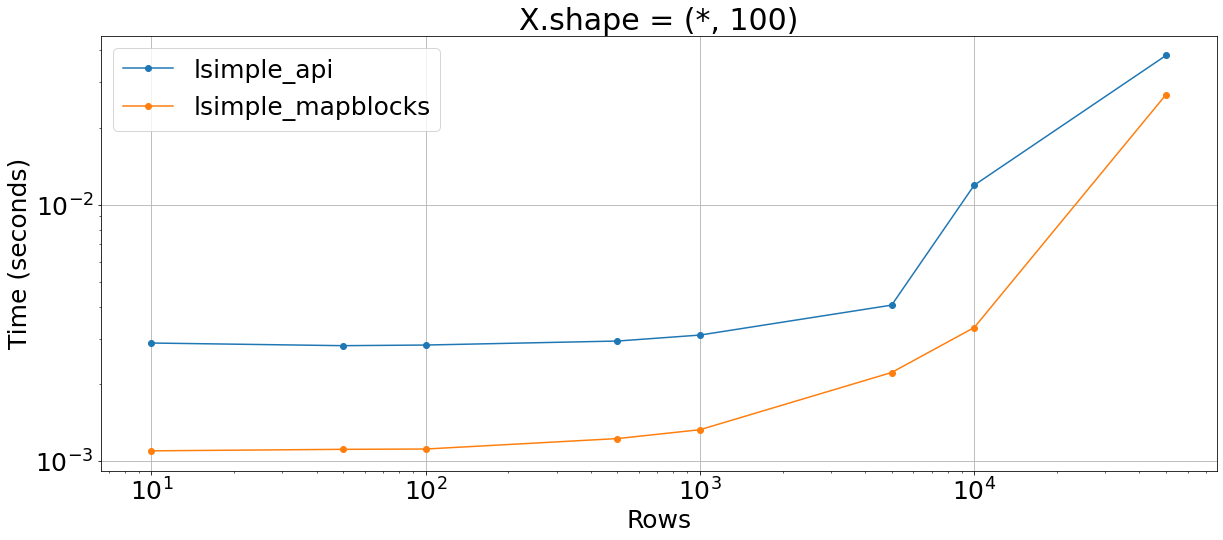

In [4]:
clear_kernels()


@kernel()
def lsimple_api(y):
    return (y - 10 + 2 * y).compute()


@kernel()
def lsimple_mapblocks(y):
    return y.map_blocks(lambda x: x - 10 + 2 * x).compute()


plot(logx=True, logy=True, xlabel="Rows", title="X.shape = (*, 100)")

## Complex operation

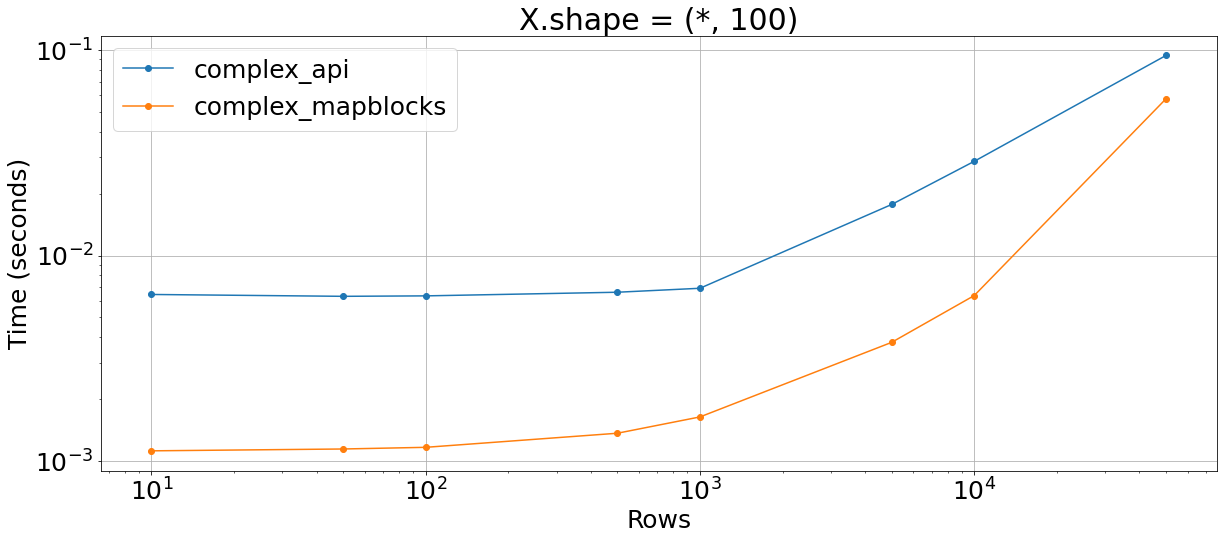

In [5]:
clear_kernels()


@kernel()
def complex_api(y):
    return (y + 2 * y - 3 * y + 4 * y - 5 * y).compute()


@kernel()
def complex_mapblocks(y):
    y.map_blocks(lambda x: x + 2 * x - 3 * x + 4 * x - 5 * x).compute()


plot(logx=True, logy=True, xlabel="Rows", title="X.shape = (*, 100)")

## Apply NumPy function

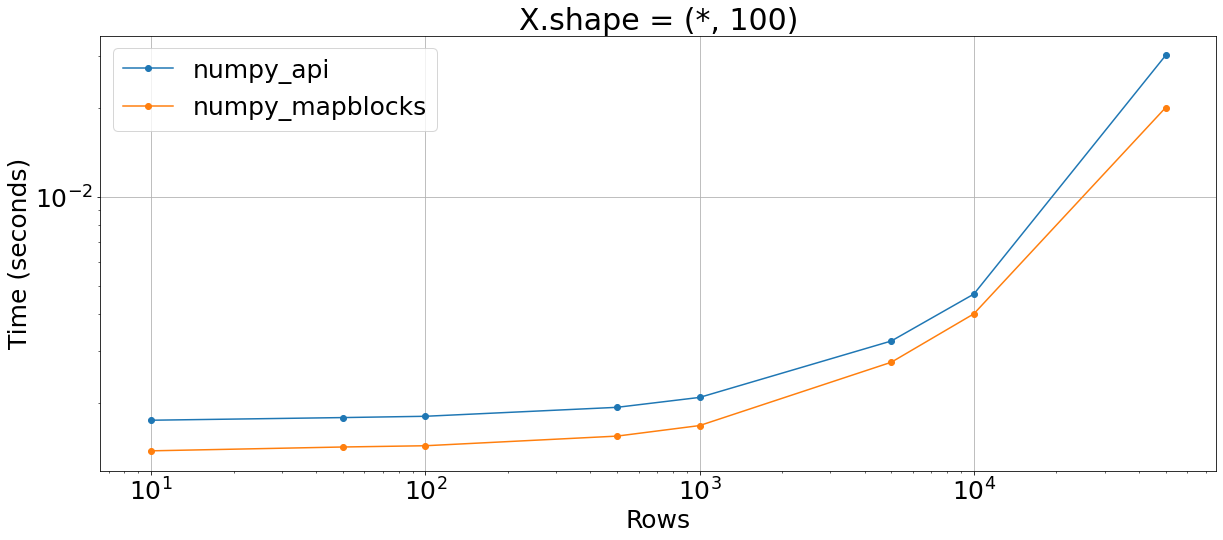

In [6]:
clear_kernels()


@kernel()
def numpy_api(y):
    return (np.exp(y + 2)).compute()


@kernel()
def numpy_mapblocks(y):
    return y.map_blocks(lambda x: np.exp(x)).compute()


plot(logx=True, logy=True, xlabel="Rows", title="X.shape = (*, 100)")